In [1]:
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt

from multi_cauchy import (
    MvsHFile,
    MvsHMeasurement,
    cauchy_cdf,
    multi_cauchy_cdf,
    fit_multi_cauchy_cdf,
    CauchyParams,
    cauchy_pdf,
    multi_cauchy_pdf,
    fit_multi_cauchy_pdf,
    quick_find_peaks,
    plot_cdf_fit,
    plot_pdf_fit,
    fit_multi_cauchy_cdf_and_pdf,
)

In [2]:
sample = Path(".") / "sample_files"
file1 = MvsHFile(sample / "201206 - Er_TiPs2COT_I_THF2 - 1 - 2 - MvsH.dat") # 1
file2 = MvsHFile(sample / "200710 - [Er(TiPS2COT)I(THF)]2 - 2 - 1 - MvsH - VSM.dat") # 2
file3 = MvsHFile(sample / "201201 - [Er_TIPS2COT_I]3 - 2 - 1 - MvsH.dat") # 3

In [3]:
file3.temperatures

[2.0]

In [4]:
meas = MvsHMeasurement(file3, 0)

In [5]:
meas_h = meas.forward['field']
meas_m = meas.forward['moment']/meas.forward['moment'].max()
meas_dmdh = np.gradient(meas_m, meas_h)

[-1492.04553222656, 1252.74133300781, 5864.71142578125]

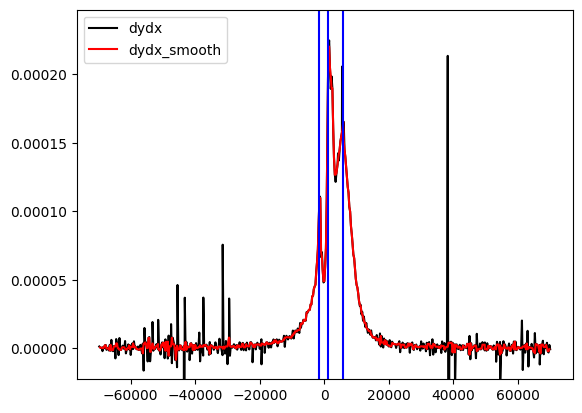

In [6]:
peaks, fig, ax = quick_find_peaks(meas_h, meas_m)
peaks

In [9]:
temp_peaks = peaks.copy()
temp_peaks.extend([-1300, 1500])
params = []
for peak in temp_peaks:
    gamma = 500
    params.append(CauchyParams(1/len(peaks), peak, gamma))

In [10]:
cdf_out = fit_multi_cauchy_cdf(meas_h, meas_m, params)
cdf_out.params

name,value,standard error,relative error,initial value,min,max,vary
m_s_0,0.06869216,0.00902143,(13.13%),0.3333333333333333,0.00000000,1.00000000,True
h_c_0,-1905.62019,45.6054698,(2.39%),-1492.04553222656,-700000.000,700000.000,True
gamma_0,632.222572,113.086614,(17.89%),500,0.00000000,100000.000,True
m_s_1,0.31543890,0.01270147,(4.03%),0.3333333333333333,0.00000000,1.00000000,True
h_c_1,1785.81678,20.3386201,(1.14%),1252.74133300781,-700000.000,700000.000,True
gamma_1,993.195459,46.3951416,(4.67%),500,0.00000000,100000.000,True
m_s_2,0.15161888,0.02136613,(14.09%),0.3333333333333333,0.00000000,1.00000000,True
h_c_2,8213.61188,129.515160,(1.58%),5864.71142578125,-700000.000,700000.000,True
gamma_2,1542.51978,107.973632,(7.00%),500,0.00000000,100000.000,True
m_s_3,0.11184409,0.01306304,(11.68%),0.3333333333333333,0.00000000,1.00000000,True


In [11]:
pdf_out = fit_multi_cauchy_pdf(meas_h, meas_dmdh, params)
pdf_out.params

name,value,standard error,relative error,initial value,min,max,vary
m_s_0,0.09359724,0.06267079,(66.96%),0.3333333333333333,0.00000000,1.00000000,True
h_c_0,-3882.87043,1568.15509,(40.39%),-1492.04553222656,-700000.000,700000.000,True
gamma_0,11325.8985,6435.30792,(56.82%),500,0.00000000,100000.000,True
m_s_1,0.10353141,0.03397735,(32.82%),0.3333333333333333,0.00000000,1.00000000,True
h_c_1,1229.82374,63.4744434,(5.16%),1252.74133300781,-700000.000,700000.000,True
gamma_1,1778.67857,413.811128,(23.27%),500,0.00000000,100000.000,True
m_s_2,0.64645172,0.04485887,(6.94%),0.3333333333333333,0.00000000,1.00000000,True
h_c_2,5603.49996,125.753990,(2.24%),5864.71142578125,-700000.000,700000.000,True
gamma_2,10088.5887,703.357602,(6.97%),500,0.00000000,100000.000,True
m_s_3,0.05802418,0.02604166,(44.88%),0.3333333333333333,0.00000000,1.00000000,True


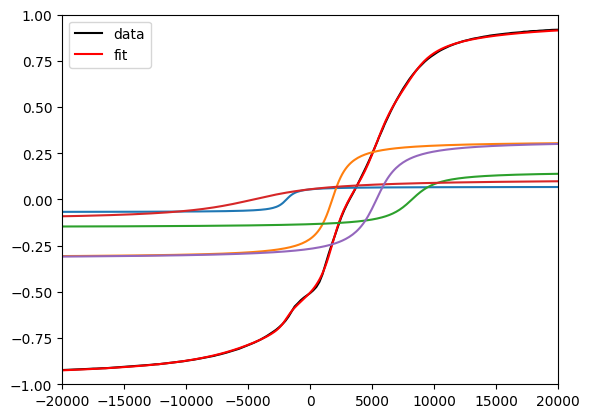

In [12]:
fig, ax = plot_cdf_fit(meas_h, meas_m, cdf_out)

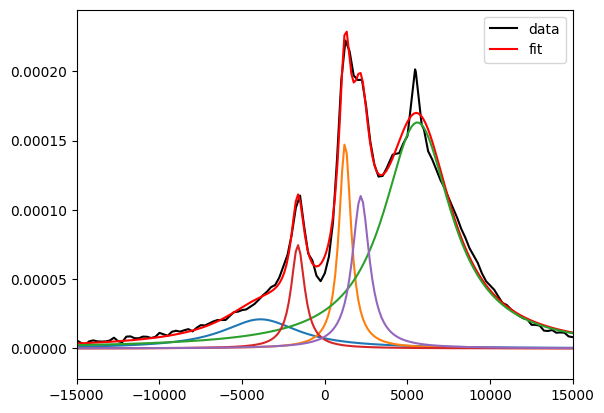

In [13]:
fig, ax = plot_pdf_fit(meas_h, meas_dmdh, pdf_out)

In [14]:
combo_out = fit_multi_cauchy_cdf_and_pdf(meas_h, meas_m, meas_dmdh, params)
combo_out.params

name,value,standard error,relative error,initial value,min,max,vary
m_s_0,0.23555435,0.10074783,(42.77%),0.3333333333333333,0.00000000,1.00000000,True
h_c_0,1002.86386,203.555659,(20.30%),-1492.04553222656,-700000.000,700000.000,True
gamma_0,0.03154545,162.305683,(514513.76%),500,0.00000000,100000.000,True
m_s_1,0.26816975,0.05870426,(21.89%),0.3333333333333333,0.00000000,1.00000000,True
h_c_1,-2913.01697,200.689768,(6.89%),1252.74133300781,-700000.000,700000.000,True
gamma_1,640.402360,357.586991,(55.84%),500,0.00000000,100000.000,True
m_s_2,0.13669274,0.01821780,(13.33%),0.3333333333333333,0.00000000,1.00000000,True
h_c_2,4506.58670,348.764809,(7.74%),5864.71142578125,-700000.000,700000.000,True
gamma_2,0.00984723,151.266558,(1536132.72%),500,0.00000000,100000.000,True
m_s_3,0.15361005,0.05375447,(34.99%),0.3333333333333333,0.00000000,1.00000000,True


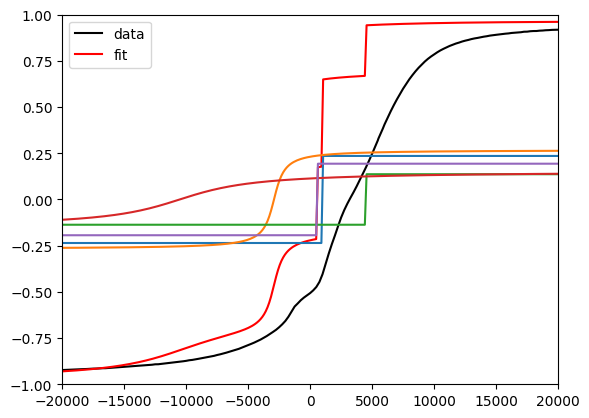

In [15]:
fig, ax = plot_cdf_fit(meas_h, meas_m, combo_out)

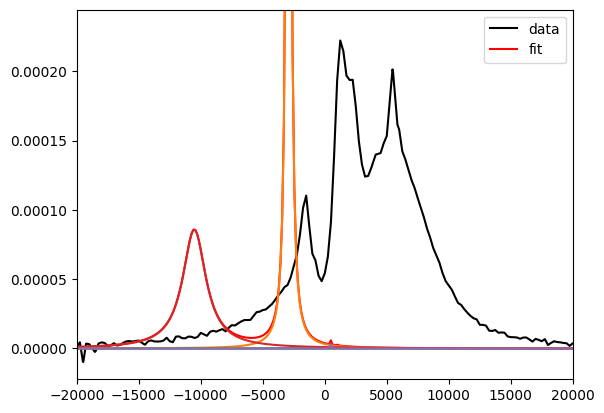

In [16]:
fig, ax = plot_pdf_fit(meas_h, meas_dmdh, combo_out)